YOLOv5 Training and Testing Guide on Mac M2 (Apple Silicon)

This describes all the steps followed to successfully train and test a YOLOv5 model on a custom dataset named human_detection_2, located on my local machine. This guide is tailored for a Mac with an M2 chip and uses Python, PyTorch with MPS support, and Ultralytics' YOLOv5 framework.



Step-by-Step Code and Descriptions

1. Check if MPS (Metal Performance Shaders) is available

Checks if MPS is available for hardware acceleration on Apple Silicon. If available, sets device to MPS for training.

In [1]:
import torch

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)


Using device: mps


2. Clone the YOLOv5 GitHub Repository

Description: Downloads the YOLOv5 codebase and moves into the directory.

In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.
/Users/pawandinendra/Desktop/human/yolov5


3. Install Required Dependencies

Installs Python packages needed to run YOLOv5, such as torch, opencv-python, etc.

In [3]:
!pip install -r requirements.txt


4. Verify Dataset Configuration File

 Displays the contents of your dataset configuration file to verify correct formatting.

In [5]:
!cat /Users/pawandinendra/Desktop/human/human_detection_2/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['person']

roboflow:
  workspace: queue-5ifhi
  project: queue-zmfis
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/queue-5ifhi/queue-zmfis/dataset/1

5. Check Python Version

Confirms the version of Python installed on your system.

In [8]:
!python3 --version


Python 3.12.2


6. Check Pip Version

Confirms the version of pip (Python package installer).

In [9]:
!pip3 --version


pip 25.1.1 from /Users/pawandinendra/miniconda3/lib/python3.12/site-packages/pip (python 3.12)


7. Check and Update Homebrew

Ensures Homebrew is working correctly and up-to-date.

In [12]:
!brew doctor
!brew update


Please note that these warnings are just used to help the Homebrew maintainers
with debugging if you file an issue. If everything you use Homebrew for is
working fine: please don't worry or file an issue; just ignore this. Thanks!

==> Updating Homebrew...
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:40e7f5d7514a7e9757facdd39006f7a351d3d7986d3a228be13c8b1c3216727b
######################################################################### 100.0%#########                                     52.1%#################                                     53.1%#####################                            64.9%###################                         68.5%
==> Pouring portable-ruby-3.4.3.arm64_big_sur.bottle.tar.gz
Updated 3 taps (osrf/simulation, homebrew/core and homebrew/cask).
==> New Formulae
add-determinism                          newsraft
anubis                                   nip4
apache-flink@1                           opkssh
api-linter 

8. Check Git Version

Verifies that Git is installed.

In [13]:
!git --version


git version 2.39.5 (Apple Git-154)


9. Install Git if Missing

Installs Git via Homebrew if not already available.

In [14]:
!brew install git


==> Downloading https://ghcr.io/v2/homebrew/core/git/manifests/2.49.0
######################################################################### 100.0%
==> Fetching dependencies for git: libunistring, gettext and pcre2
==> Downloading https://ghcr.io/v2/homebrew/core/libunistring/manifests/1.3
######################################################################### 100.0%
==> Fetching libunistring
==> Downloading https://ghcr.io/v2/homebrew/core/libunistring/blobs/sha256:3cd26
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/gettext/manifests/0.25
######################################################################### 100.0%
==> Fetching gettext
==> Downloading https://ghcr.io/v2/homebrew/core/gettext/blobs/sha256:8dba9424a9
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/pcre2/manifests/10.45
##############################

10. Install PyTorch and TorchVision

Installs PyTorch and related libraries compatible with M1/M2 chip.

In [15]:
!pip install torch torchvision torchaudio


11. Confirm MPS Availability Again

Re-checks that MPS backend is enabled after PyTorch installation

In [16]:
import torch
print(torch.backends.mps.is_available())  # Should return True on M2


True


12. Install Python 3.11 and Git

Ensures latest versions of Python and Git are installed and updates pip.

In [17]:
!brew install python@3.11 git
!pip3 install --upgrade pip
!pip3 install torch torchvision torchaudio


To reinstall 2.49.0, run:
  brew reinstall git
==> Downloading https://ghcr.io/v2/homebrew/core/python/3.11/manifests/3.11.12
######################################################################### 100.0%
==> Fetching dependencies for python@3.11: xz
==> Downloading https://ghcr.io/v2/homebrew/core/xz/manifests/5.8.1
######################################################################### 100.0%
==> Fetching xz
==> Downloading https://ghcr.io/v2/homebrew/core/xz/blobs/sha256:dcd7823f2624cbc
######################################################################### 100.0%
==> Fetching python@3.11
==> Downloading https://ghcr.io/v2/homebrew/core/python/3.11/blobs/sha256:ef44fa
######################################################################### 100.0%
==> Installing dependencies for python@3.11: xz
==> Installing python@3.11 dependency: xz
==> Downloading https://ghcr.io/v2/homebrew/core/xz/manifests/5.8.1
Already downloaded: /Users/pawandinendra/Library/Caches/Homebrew/downloads/

13. Create and Activate a Virtual Environment

Creates a virtual environment for Python to avoid conflicts with system-wide packages.

In [20]:
!python3 -m venv yolov5-env
!source yolov5-env/bin/activate


14. Install Common Python Libraries

Installs essential packages used for training, plotting, and visualizing.

In [21]:
!pip install --upgrade pip
!pip install jupyter
!pip install torch torchvision torchaudio
!pip install matplotlib pandas opencv-python seaborn


15. Clone YOLOv5 Repository Again 

Redundant but ensures YOLOv5 is available and dependencies are met.

In [22]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17428, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 17428 (delta 73), reused 28 (delta 28), pack-reused 17327 (from 2)
Receiving objects: 100% (17428/17428), 16.29 MiB | 2.03 MiB/s, done.
Resolving deltas: 100% (11943/11943), done.


16. Open Project in Visual Studio Code

Opens the YOLOv5 project directory in VS Code for development or code inspection.

In [4]:
!code /Users/pawandinendra/Desktop/human/yolov5


17. Change Directory to YOLOv5

Navigates to the YOLOv5 folder in your local directory.

In [5]:
cd /Users/pawandinendra/Desktop/human/yolov5


/Users/pawandinendra/Desktop/human/yolov5


18. Train the YOLOv5 Model

Description: Trains the YOLOv5 model on your dataset:

--img 640: Input image size

--batch 16: Batch size

--epochs 50: Total training epochs

--data: Path to dataset YAML

--weights: Pretrained weights

--project: Project folder to save results

--name: Run name

--cache: Cache images for faster training

In [6]:
!python train.py --img 640 --batch 16 --epochs 50 --data ../human_detection_2/data.yaml --weights yolov5s.pt --project runs/train --name yolo_m2 --cache


train: weights=yolov5s.pt, cfg=, data=../human_detection_2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_m2, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: ⚠️ YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.12.2 torch-2.6.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, war

19. Run Detection on Test Set

Runs inference using the trained model on your test image folder. It uses the best weights saved from training.

In [7]:
!python detect.py --weights runs/train/yolo_m24/weights/best.pt --img 640 --conf 0.25 --source ../human_detection_2/test/images


detect: weights=['runs/train/yolo_m24/weights/best.pt'], source=../human_detection_2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.12.2 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/67 /Users/pawandinendra/Desktop/human/human_detection_2/test/images/103_png.rf.ba8195bbdab66c044d2c3c6070f50b5a.jpg: 640x640 2 persons, 118.2ms
image 2/67 /Users/pawandinendra/Desktop/human/human_detection_2/test/images/111_png.rf.bb2b94cc12435d43394c6198a1930dd3.jpg: 640x640 4 persons, 104.4ms
image 3/67 /Users/pawan

20. Display Sample Detection Results (in Jupyter)

Displays the first 5 output images using Python’s IPython display module.

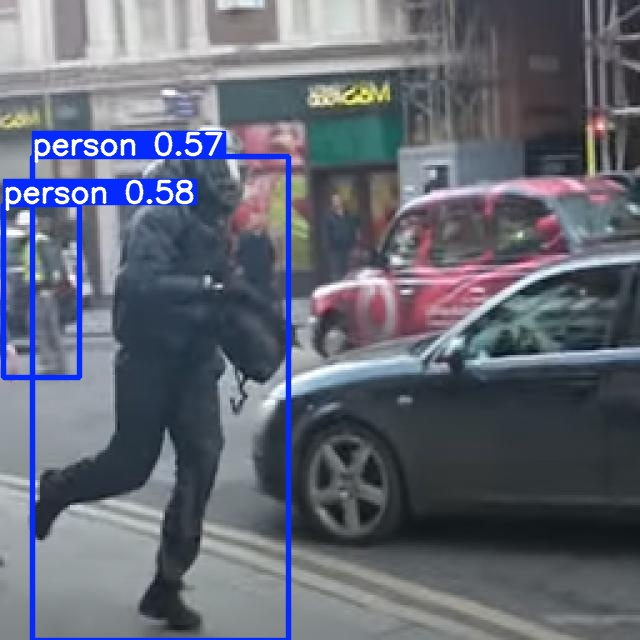

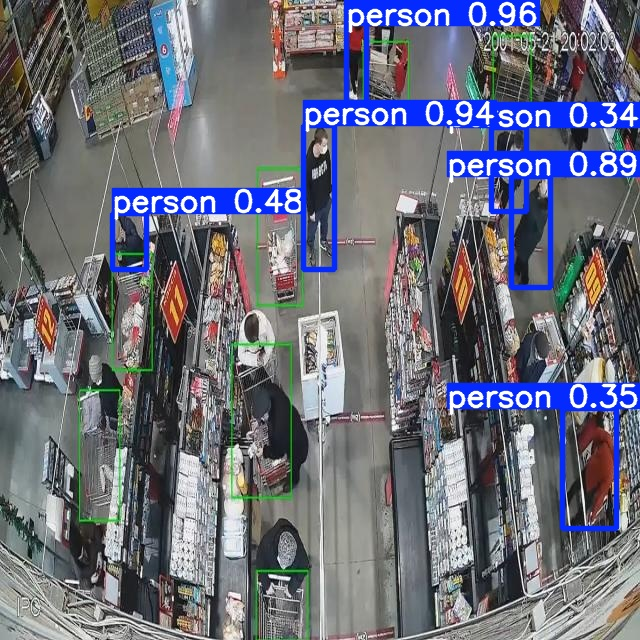

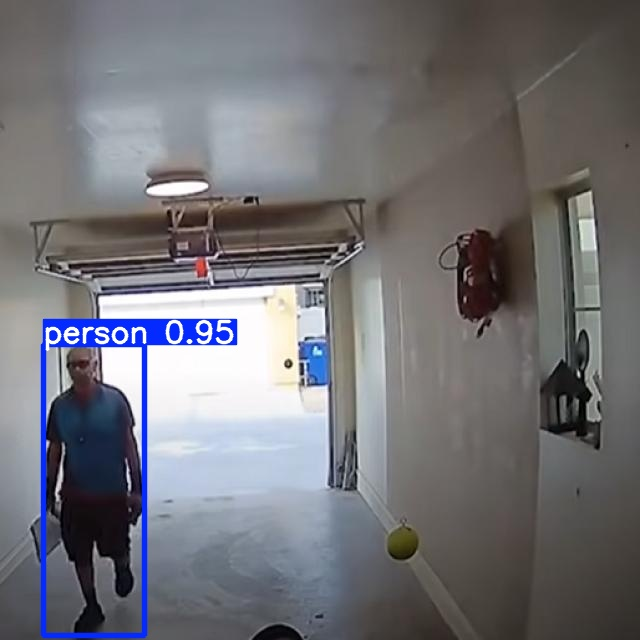

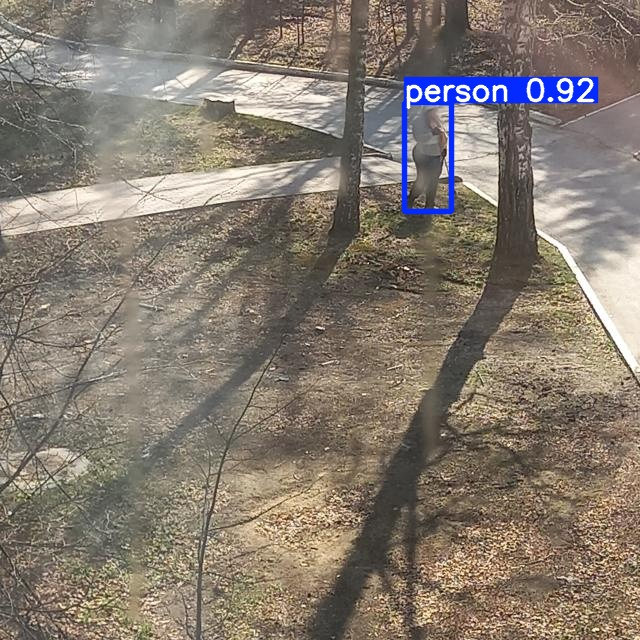

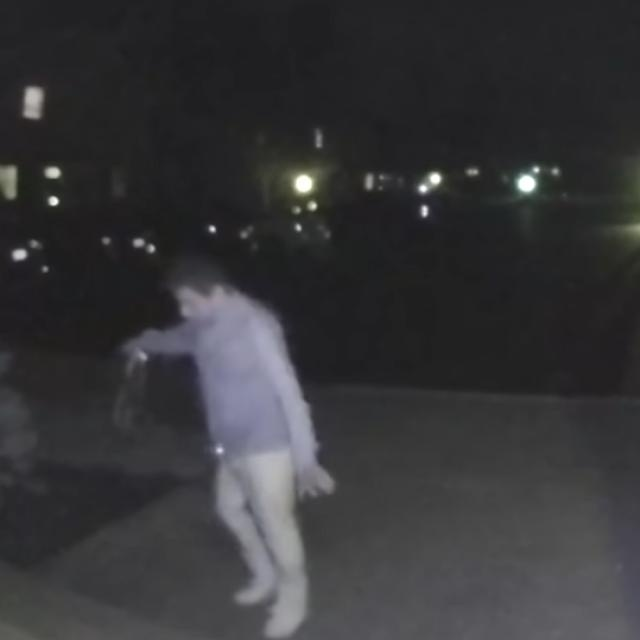

In [8]:
from IPython.display import Image, display
import os

# Path to your results folder
result_dir = 'runs/detect/exp/'

# Display a few sample images
for img_file in os.listdir(result_dir)[:5]:  # Show first 5 images
    if img_file.endswith('.jpg') or img_file.endswith('.png'):
        display(Image(filename=os.path.join(result_dir, img_file)))




21. Test the Model on a Custom Single Image (test_image.jpg)

Tests the model on a specific image with confidence threshold set to 0.25. Output is saved in runs/detect/test_image_output.

In [9]:
!python detect.py \
  --weights runs/train/yolo_m24/weights/best.pt \
  --source /Users/pawandinendra/Desktop/human/test_image.jpg \
  --img 640 \
  --conf 0.25 \
  --save-conf \
  --project runs/detect \
  --name test_image_output \
  --exist-ok


detect: weights=['runs/train/yolo_m24/weights/best.pt'], source=/Users/pawandinendra/Desktop/human/test_image.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=test_image_output, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.12.2 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/pawandinendra/Desktop/human/test_image.jpg: 448x640 2 persons, 79.9ms
Speed: 0.9ms pre-process, 79.9ms inference, 6.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_image_output


22. Test the Model on Another Custom Image (test.jpg)

Similar to step 21, but on a different image. Allows testing your model against any specific photo for evaluation.

In [ ]:
!python detect.py \
  --weights runs/train/yolo_m24/weights/best.pt \
  --source /Users/pawandinendra/Desktop/human/test.jpg \
  --img 640 \
  --conf 0.25 \
  --save-conf \
  --project runs/detect \
  --name test_image_output \
  --exist-ok


detect: weights=['runs/train/yolo_m24/weights/best.pt'], source=/Users/pawandinendra/Desktop/human/test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=test_image_output, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.12.2 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/pawandinendra/Desktop/human/test.jpg: 480x640 3 persons, 83.1ms
Speed: 0.7ms pre-process, 83.1ms inference, 5.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_image_output


23. This is the `results.png` plot generated by YOLOv5 after training. It visually summarizes how my model's performance evolved over the 50 epochs.

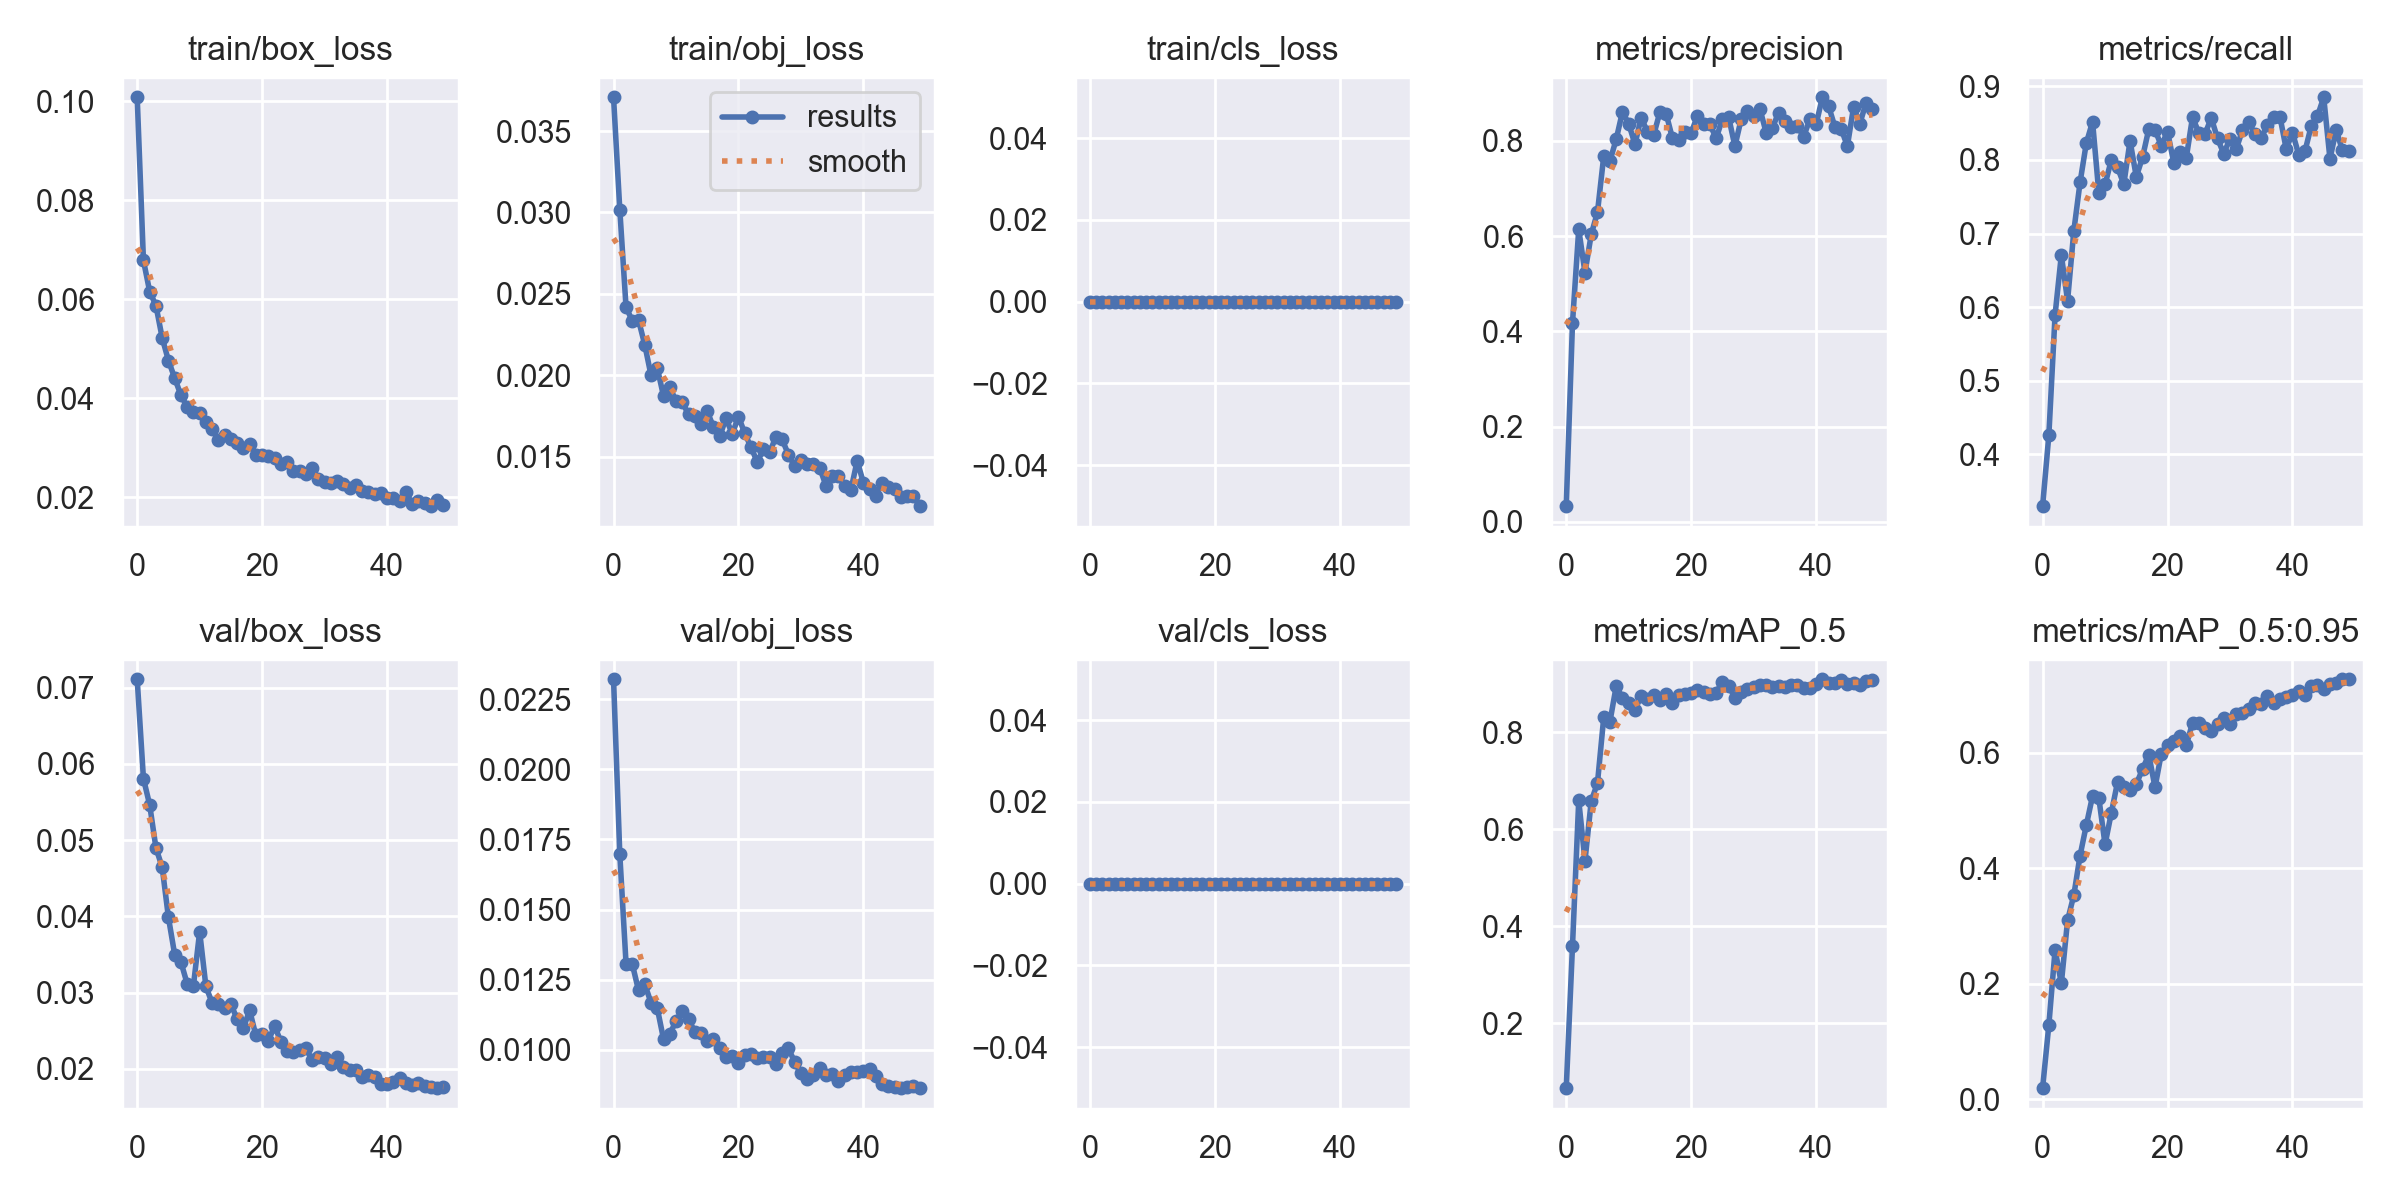

In [12]:
from IPython.display import Image

# Replace with your actual path
Image(filename='runs/train/yolo_m24/results.png', width=800)




### 🔍 Interpretation of Each Graph:

#### 📉 1. train/box\_loss

**Meaning** : Measures how well the predicted bounding boxes fit the ground truth (during training).
**Observation**: The loss decreases steadily, which is good — your model is learning to localize better.

#### 📉 2. train/obj\_loss

* **Meaning**: Objectness loss during training — how well the model predicts whether an object exists in a box.
* **Observation**: Decreasing trend indicates your model is getting better at distinguishing objects from background.

#### 📉 3. train/cls\_loss

* **Meaning**: Classification loss for multi-class problems (e.g., distinguishing between 'person' vs 'car').
* **Observation**: Always **0** — that’s expected for **single-class detection** (e.g., just detecting 'human').

#### 📈 4. metrics/precision

* **Meaning**: Of all the detections made, how many were correct (TP / (TP + FP)).
* **Observation**: Rises above **0.9**, which is **excellent** — the model is making mostly correct predictions.

#### 📈 5. metrics/recall

* **Meaning**: Of all actual objects, how many were detected (TP / (TP + FN)).
* **Observation**: Also stabilizes above **0.85**, meaning it's catching most humans in images.

#### 📉 **6. val/box\_loss**

* **Meaning**: Bounding box loss on the validation set.
* **Observation**: Follows the same downward trend as training — shows **good generalization**.

#### 📉 **7. val/obj\_loss**

* **Meaning**: Objectness loss on the validation set.
* **Observation**: Decreases and stabilizes — again, a healthy sign.

#### 📉 **8. val/cls\_loss**

* **Meaning**: Always 0 — again, **expected for single-class models**.

#### 📈 **9. metrics/mAP\_0.5**

* **Meaning**: Mean Average Precision (mAP) at Intersection over Union (IoU) = 0.5. Think of this as overall detection performance.
* **Observation**: Climbs steadily and hits **\~0.88**, which is **very good**.

#### 📈 **10. metrics/mAP\_0.5:0.95**

* **Meaning**: Stricter mAP, averaging performance across IoU thresholds from 0.5 to 0.95.
* **Observation**: Ends around **0.72**, which is **strong** — your model is not just detecting, it's doing it accurately and consistently.

### ✅ Summary

My YOLOv5 model is:

* Learning well (training/validation losses are decreasing).
* Generalizing well (validation loss mimics training loss).
* Achieving **high precision**, **recall**, and **mAP**.

This means your model is very likely ready for testing on real or new unseen disaster-zone images.
